In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#import sweetviz as sz
import pandas as pd
import pandas as pd
#from scapy.all import rdpcap
#from tueplots import bundles
#from tueplots.constants.color import rgb
from matplotlib.colors import LinearSegmentedColormap
#import chardet
import binascii
import os


In [8]:
#os.getcwd()

'C:\\Users\\mihai\\Documents\\Faculta\\Data Literacy\\Mensa Project\\dataLiteracyPeopleCounting'

In [10]:
df_all=pd.read_csv('C:/Users/mihai/Documents/Faculta/Data Literacy/Mensa Project/csv_data/wednesday100124.csv')
df_all

,frame.number,frame.time,wlan.sa,wlan.da,_ws.col.protocol,frame.len,wlan.ssid
0,1,"Jan 10, 2024 10:01:07.758711000 Mitteleuropäis...",00:f6:63:81:c8:6b,ff:ff:ff:ff:ff:ff,802.11,298,55546775657374
1,2,"Jan 10, 2024 10:01:07.784807000 Mitteleuropäis...",NaN,NaN,802.11,39,NaN
2,3,"Jan 10, 2024 10:01:07.794917000 Mitteleuropäis...",50:ed:3c:13:d7:4d,00:f6:63:81:c8:6f,802.11,43,NaN
3,4,"Jan 10, 2024 10:01:07.795010000 Mitteleuropäis...",NaN,NaN,802.11,29,NaN
4,5,"Jan 10, 2024 10:01:07.795542000 Mitteleuropäis...",00:f6:63:81:c8:6e,ff:ff:ff:ff:ff:ff,802.11,286,4775657374
...,...,...,...,...,...,...,...
15338369,15338370,"Jan 10, 2024 12:59:52.317226000 Mitteleuropäis...",NaN,NaN,802.11,35,NaN
15338370,15338371,"Jan 10, 2024 12:59:52.317274000 Mitteleuropäis...",NaN,NaN,802.11,29,NaN
15338371,15338372,"Jan 10, 2024 12:59:52.317323000 Mitteleuropäis...",NaN,NaN,802.11,33,NaN
15338372,15338373,"Jan 10, 2024 12:59:52.317375000 Mitteleuropäis...",NaN,NaN,802.11,47,NaN


exploring data based on SSID's

In [13]:
# ssids_counts = df_all["wlan.ssid"].value_counts().reset_index()
# ssids_counts.columns = ["wlan.ssid", "count"]

# # Step 2: Group by WLAN SSID and count the number of unique entries in wlan.sa
# unique_sa_counts = df_all.groupby("wlan.ssid")["wlan.sa"].nunique().reset_index()
# unique_sa_counts.columns = ["wlan.ssid", "unique_sa_count"]

# # Step 3: Merge the two DataFrames on "wlan.ssid"
# result = pd.merge(ssids_counts, unique_sa_counts, on="wlan.ssid")
# result = result.to_numpy()
# # Conversion from hexadecimal to "human"
def hex_to_str(hex_str):
    if len(hex_str) % 2 != 0:
        return hex_str
    bytes_obj = binascii.unhexlify(hex_str)
    return bytes_obj.decode('latin-1')


# vec_func = np.vectorize(hex_to_str)

# result[:,0] = vec_func(result[:,0])
# # This displays the first 40 ssids and their number of entries

# names = result[:40, 0]
# value = result[:40, 2].astype(int)

# plt.bar(names, value)
# plt.xlabel("ssids")
# plt.xticks(rotation='vertical')
# plt.ylabel("count")
# plt.yscale("log")
# plt.ylim(bottom=0.1)
# plt.title("Entries per network")
# plt.show()

we get the users on just one SSID network

In [105]:
def str_to_hex(input_str):
    hex_str = binascii.hexlify(input_str.encode('latin-1')).decode()
    return hex_str

In [107]:
str_to_hex("eduroam")

'656475726f616d'

In [108]:
str_to_hex("UTguest")

'55546775657374'

In [109]:
str_to_hex("Guest")

'4775657374'

In [111]:
print(hex_to_str("656475726f616d"))
df = df_all[(df_all["wlan.ssid"] == "656475726f616d" )|( df_all["wlan.ssid"] == "55546775657374" )|( df_all["wlan.ssid"] == "4775657374")]

eduroam


converting the time format to a processable one and dropping all na values in the source set to further clean the data

In [112]:

# Suppose df is your DataFrame
df["frame.time"] = df["frame.time"].str.replace(r':\d+\.\d+', '', regex=True)
df['frame.time'] = df['frame.time'].str.replace('Mitteleuropäische Zeit', 'CET')
df['date-time'] = pd.to_datetime(df['frame.time'].str.strip(), format='%b %d, %Y %H:%M %Z', errors='coerce')
df['hour:minute'] = df['date-time'].dt.strftime('%H:%M')
df.dropna(subset=["wlan.sa"], inplace=True)  # Use inplace=True to modify the DataFrame in-place


C:\Users\mihai\AppData\Local\Temp\ipykernel_2780\2763307562.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["frame.time"] = df["frame.time"].str.replace(r':\d+\.\d+', '', regex=True)
C:\Users\mihai\AppData\Local\Temp\ipykernel_2780\2763307562.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['frame.time'] = df['frame.time'].str.replace('Mitteleuropäische Zeit', 'CET')
C:\Users\mihai\AppData\Local\Temp\ipykernel_2780\2763307562.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy 

In [113]:
df.tail(5)

,frame.number,frame.time,wlan.sa,wlan.da,_ws.col.protocol,frame.len,wlan.ssid,date-time,hour:minute
15338022,15338023,"Jan 10, 2024 12:59 CET",00:f6:63:81:c8:6b,ff:ff:ff:ff:ff:ff,802.11,306,55546775657374,2024-01-10 12:59:00+01:00,12:59
15338091,15338092,"Jan 10, 2024 12:59 CET",00:f6:63:81:c8:6e,ff:ff:ff:ff:ff:ff,802.11,294,4775657374,2024-01-10 12:59:00+01:00,12:59
15338241,15338242,"Jan 10, 2024 12:59 CET",00:f6:63:81:c8:6f,ff:ff:ff:ff:ff:ff,802.11,336,656475726f616d,2024-01-10 12:59:00+01:00,12:59
15338268,15338269,"Jan 10, 2024 12:59 CET",00:f6:63:81:c8:6b,ff:ff:ff:ff:ff:ff,802.11,302,55546775657374,2024-01-10 12:59:00+01:00,12:59
15338365,15338366,"Jan 10, 2024 12:59 CET",00:f6:63:81:c8:6e,ff:ff:ff:ff:ff:ff,802.11,286,4775657374,2024-01-10 12:59:00+01:00,12:59


In [138]:
#val_counts = df['wlan.da'].value_counts().head(10)

In [137]:
#val_counts.index

In [136]:
#df['wlan.sa'].value_counts()

In [118]:
unique_mac_per_min = df.groupby('hour:minute').nunique()

In [80]:
#unique_mac_per_min.head()

In [79]:
#unique_mac_per_min.index

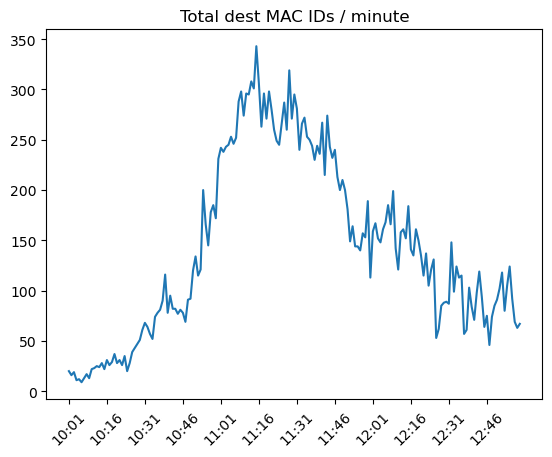

In [132]:
plt.plot(unique_mac_per_min['wlan.da'])
interval_minutes = 15
tick_positions = np.arange(0, len(unique_mac_per_min.index), interval_minutes)
plt.xticks(tick_positions, [unique_mac_per_min.index[i] for i in tick_positions], rotation=45)
plt.title('Total dest MAC IDs / minute')
plt.show()
#plt.xticks(unique_mac_per_min['date-time'].index)

In [133]:
# checking to see if sum is correct
#df.groupby('hour:minute')['wlan.sa'].nunique() + df.groupby('hour:minute')['wlan.da'].nunique()

In [120]:
sum_sa_da = df.groupby('hour:minute')['wlan.sa'].nunique() + df.groupby('hour:minute')['wlan.da'].nunique()

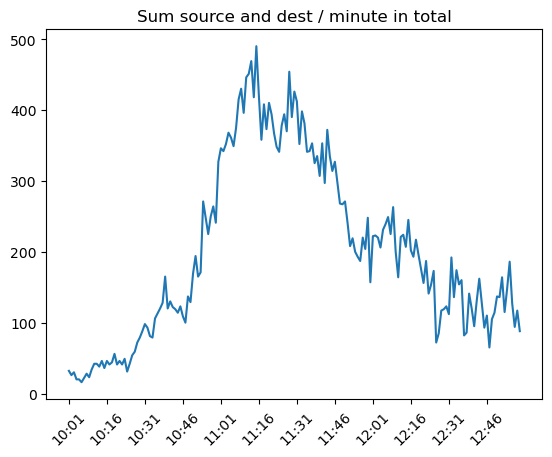

In [134]:
plt.plot(sum_sa_da)
interval_minutes = 15
tick_positions = np.arange(0, len(sum_sa_da.index), interval_minutes)
plt.xticks(tick_positions, [sum_sa_da.index[i] for i in tick_positions], rotation=45)
plt.title('Sum source and dest / minute in total')
plt.show()
#plt.xticks(unique_mac_per_min['date-time'].index)

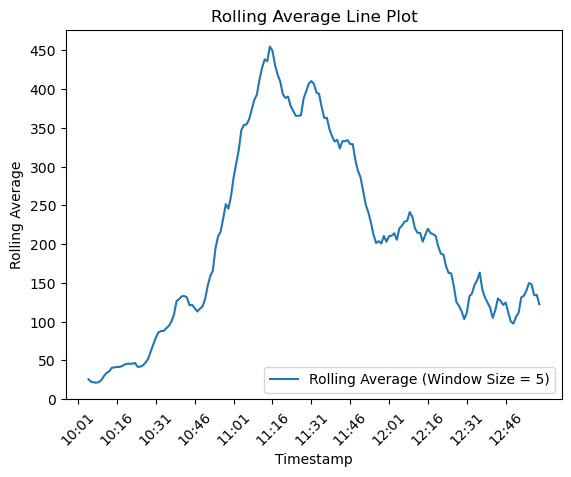

In [135]:
# Calculate a rolling average with a specified window size (e.g., 5 minutes)
window_size = 5
rolling_avg = sum_sa_da.rolling(window=window_size).mean()

# Create a line plot of the rolling average
plt.plot(sum_sa_da.index, rolling_avg, label=f'Rolling Average (Window Size = {window_size})')
plt.xlabel('Timestamp')
tick_positions = np.arange(0, len(sum_sa_da.index), interval_minutes)
plt.xticks(tick_positions, [sum_sa_da.index[i] for i in tick_positions], rotation=45)
plt.ylabel('Rolling Average')
plt.yticks(range(0,500,50))
plt.title('Rolling Average Line Plot')
plt.legend()


# Show the plot
plt.show()

Rolling average does not make sense in post.